##### Dataset

In [2]:
# Name: SMSSpamCollection
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

##### Read the dataset

In [6]:
df = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label','text'])

In [7]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.shape

(5572, 2)

##### Separate the input and ouput variables

In [10]:
x = df['text']
y = df['label']

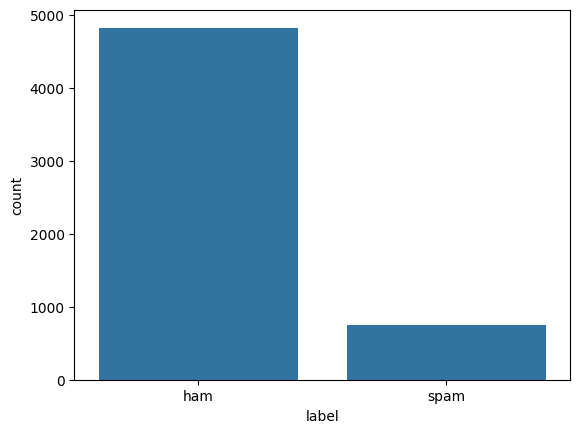

In [11]:
sns.countplot(x = y);

In [12]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

##### Data Preparation

###### Data Cleaning

In [15]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [16]:
sent = 'Hello friends! How are you? I like Python Programming language.'

In [17]:
tokens1 = word_tokenize(sent)

In [19]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 'language',
 '.']

In [21]:
tokens2 = [word for word in tokens1 if word.isalpha()]

In [22]:
tokens2

['Hello',
 'friends',
 'How',
 'are',
 'you',
 'I',
 'like',
 'Python',
 'Programming',
 'language']

In [23]:
swords = stopwords.words('english')

In [28]:
tokens3 = [word.lower() for word in tokens2 if word.lower() not in swords]

In [29]:
tokens3

['hello', 'friends', 'like', 'python', 'programming', 'language']

In [30]:
ps = PorterStemmer()

In [31]:
tokens4 = [ps.stem(word) for word in tokens3]
tokens4

['hello', 'friend', 'like', 'python', 'program', 'languag']

In [32]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [word for word in tokens1 if word.isalpha()]
    tokens3 = [word.lower() for word in tokens2 if word.lower() not in swords]
    tokens4 = [ps.stem(word) for word in tokens3]
    return tokens4

In [33]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program', 'languag']

###### TF*IDF Vectorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [37]:
x_new = tfidf.fit_transform(x)

In [38]:
x_new.shape

(5572, 5925)

##### Cross-Validation

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0)

In [42]:
x_train.shape

(4179, 5925)

In [43]:
x_test.shape

(1393, 5925)

##### Build the model

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [46]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
y_pred = rf.predict(x_test)

In [49]:
accuracy_score(y_test, y_pred)

0.9777458722182341

##### Predict on unseen data

In [51]:
# Dataset: sample.csv

In [52]:
f = open('sample.csv')

In [53]:
msg = f.readlines()

In [54]:
msg

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [56]:
rf.predict(tfidf.transform(msg))

array(['ham', 'spam', 'ham'], dtype=object)